<a href="https://colab.research.google.com/github/Alfonso-Jesus-Garcia-Moya/Tecnicas_de_inteligencia_artificial/blob/main/SEMANA%2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesión 13. Algoritmos meméticos - teoría & aplicación

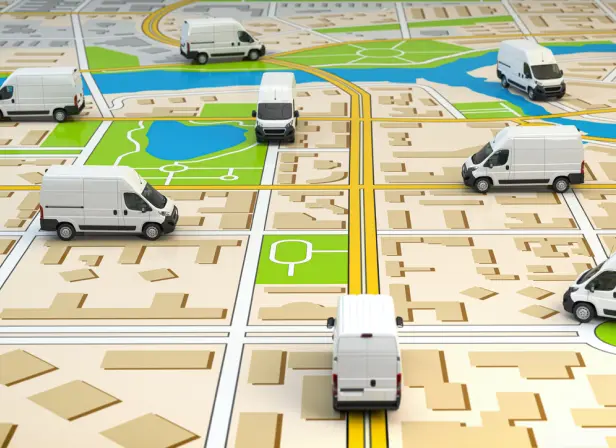

Imagina que en una ciudad con muchos repartidores que deben entregar paquetes en varias colonias, pero nadie les otorgó una ruta con el camino más corto, así que cada quién inventa su propia ruta

Al final del día:

* algunos repartidores tardan mucho,
* otros llegan rápido (tal vez porque conocen la ciudad),
* y todos comparan resultados

Así, para el siguiente día, los repartidores deciden aprender de los mejores:

* copian partes de las rutas más rápidas,
* mezclan ideas,
* y, de vez en cuando, prueban un nuevo camino al azar

Este proceso de copiar, combinar y mutar rutas es un algoritmo genético

Cada repartidor es una posible solución, y todos juntos forman una población que evoluciona con el tiempo

Recordando...

* los algoritmos genéticos se inspiran en la evolución natural
* funcionan como la selección natural de Darwin
* solo los más aptos sobreviven y se reproducen

|Etapa | Qué hace | Ejemplo|
|------|-----------------|----------|
|Población inicial| Soluciones aleatorias| Repartidores con rutas al azar|
|Evaluación (fitness) | Mide qué tan buena es la solución | Qué tan corta es la ruta|
|Selección | Elige las mejores soluciones | Los repartidores más rápidos|
|Cruza (reproducción) | Mezcla partes de dos soluciones | Un repartidor mezcla su mapa con otro|
|Mutación | Cambia algo pequeño al azar| Un repartidor toma una calle nueva|
|Reemplazo | Crea una nueva generación | Las nuevas rutas reemplazan a las viejas|

Pero... ¿qué pasa si algunos repartidores también piensan por sí mismos?

Los algoritmos genéticos solo evolucionan colectivamente, pero en la vida real, no solo se copia, también se aprende

Un buen repartidor no solo mezcla mapas con otros

* observa sus propios errores
* corrige calles equivocadas
* y mejora su ruta antes de compartirla

Eso es **aprendizaje individual**

Cuando se combina evolución + aprendizaje

esto hace que aparezca una nueva generación de algoritmos:los *algortimos meméticos*

## algoritmos meméticos

Son un marco computacional basado en la población, y comparten una serie de características con métodos como los algoritmos evolutivos y la búsqueda dispersa

Mantienen un conjunto de soluciones candidatas de alta calidad y utilizan estas soluciones para crear nuevas soluciones mediante la aplicación de operadores de variación, como combinaciones y mejoras locales

Se puede decir que es una evolución del algoritmo genético y está inspirado no solo en la biología, sino también en la cultura y el aprendizaje humano

La palabra memético viene de meme, un término que se define como una unidad de información cultural que se copia, se adapta y evoluciona, como una idea o costumbre

Así, como los genes transmiten información biológica, los memes transmiten ideas que también aprenden y mejoran

En términos computacionales, cada individuo (que representa una solución) no solo evoluciona, sino que mejora localmente por sí mismo antes de reproducirse

Un algoritmo memético típico se compone de los siguientes componentes básicos:

* una población de individuos para muestrear el espacio de búsqueda
* un operador de combinación (crossover) para crear nuevas soluciones candidatas (descencencia) mezclando dos o más soluciones de la población
* un procedimiento de mejora local para mejorar las soluciones de la descendencia
* una estrategia de gestión de la población para actualizar la población con la descendencia

|Aspecto|Algoritmo genético|Algoritmo memético|
|--------|---------------|-------------------|
|Inspiración| Evolución biológica| Evolución + aprendizaje cultural|
|Mejora| Colectiva (por selección) | Colectiva + infividual|
|Tipo de búsqueda| Global (explora todo el espacio) | Global + local (explora y refina)|
|Diversidad| Alta (muchos cambios)| Equilibrada|
|Precisión| Buena, pero puede estancarse| Más rápida y fina|
|Analogía| Copiar ruta de los mejores| Copiar ruta + revisarlas y optimizarlas|

### ¿Cómo funciona un algoritmo memético?

1. se genera una población de posibles soluciones
2. cada solución se evalúa
3. se seleccionan y cruzan las mejores soluciones
4. se mutal algunas para explorar nuevas ideas
5. cada individuo aplica un paso local de mejora (su propio aprendizaje)
6. se crea una nueva generación con las mejores versiones

El ciclo se repite muchas veces, hasta que las soluciones dejan de mejorar

### aplicaciones

* diseño de rutas y logística (transporte, drones, reparto)
* entrenamiento de modelos de IA (ajuste fino de parámetros)
* bioinformática (ensamblaje de secuencias genéticas)
* diseño industrial y arquitectónico (búsqueda de formas óptimas)
* optimización en videojuegos (estrategias y comportamiento adaptativo)

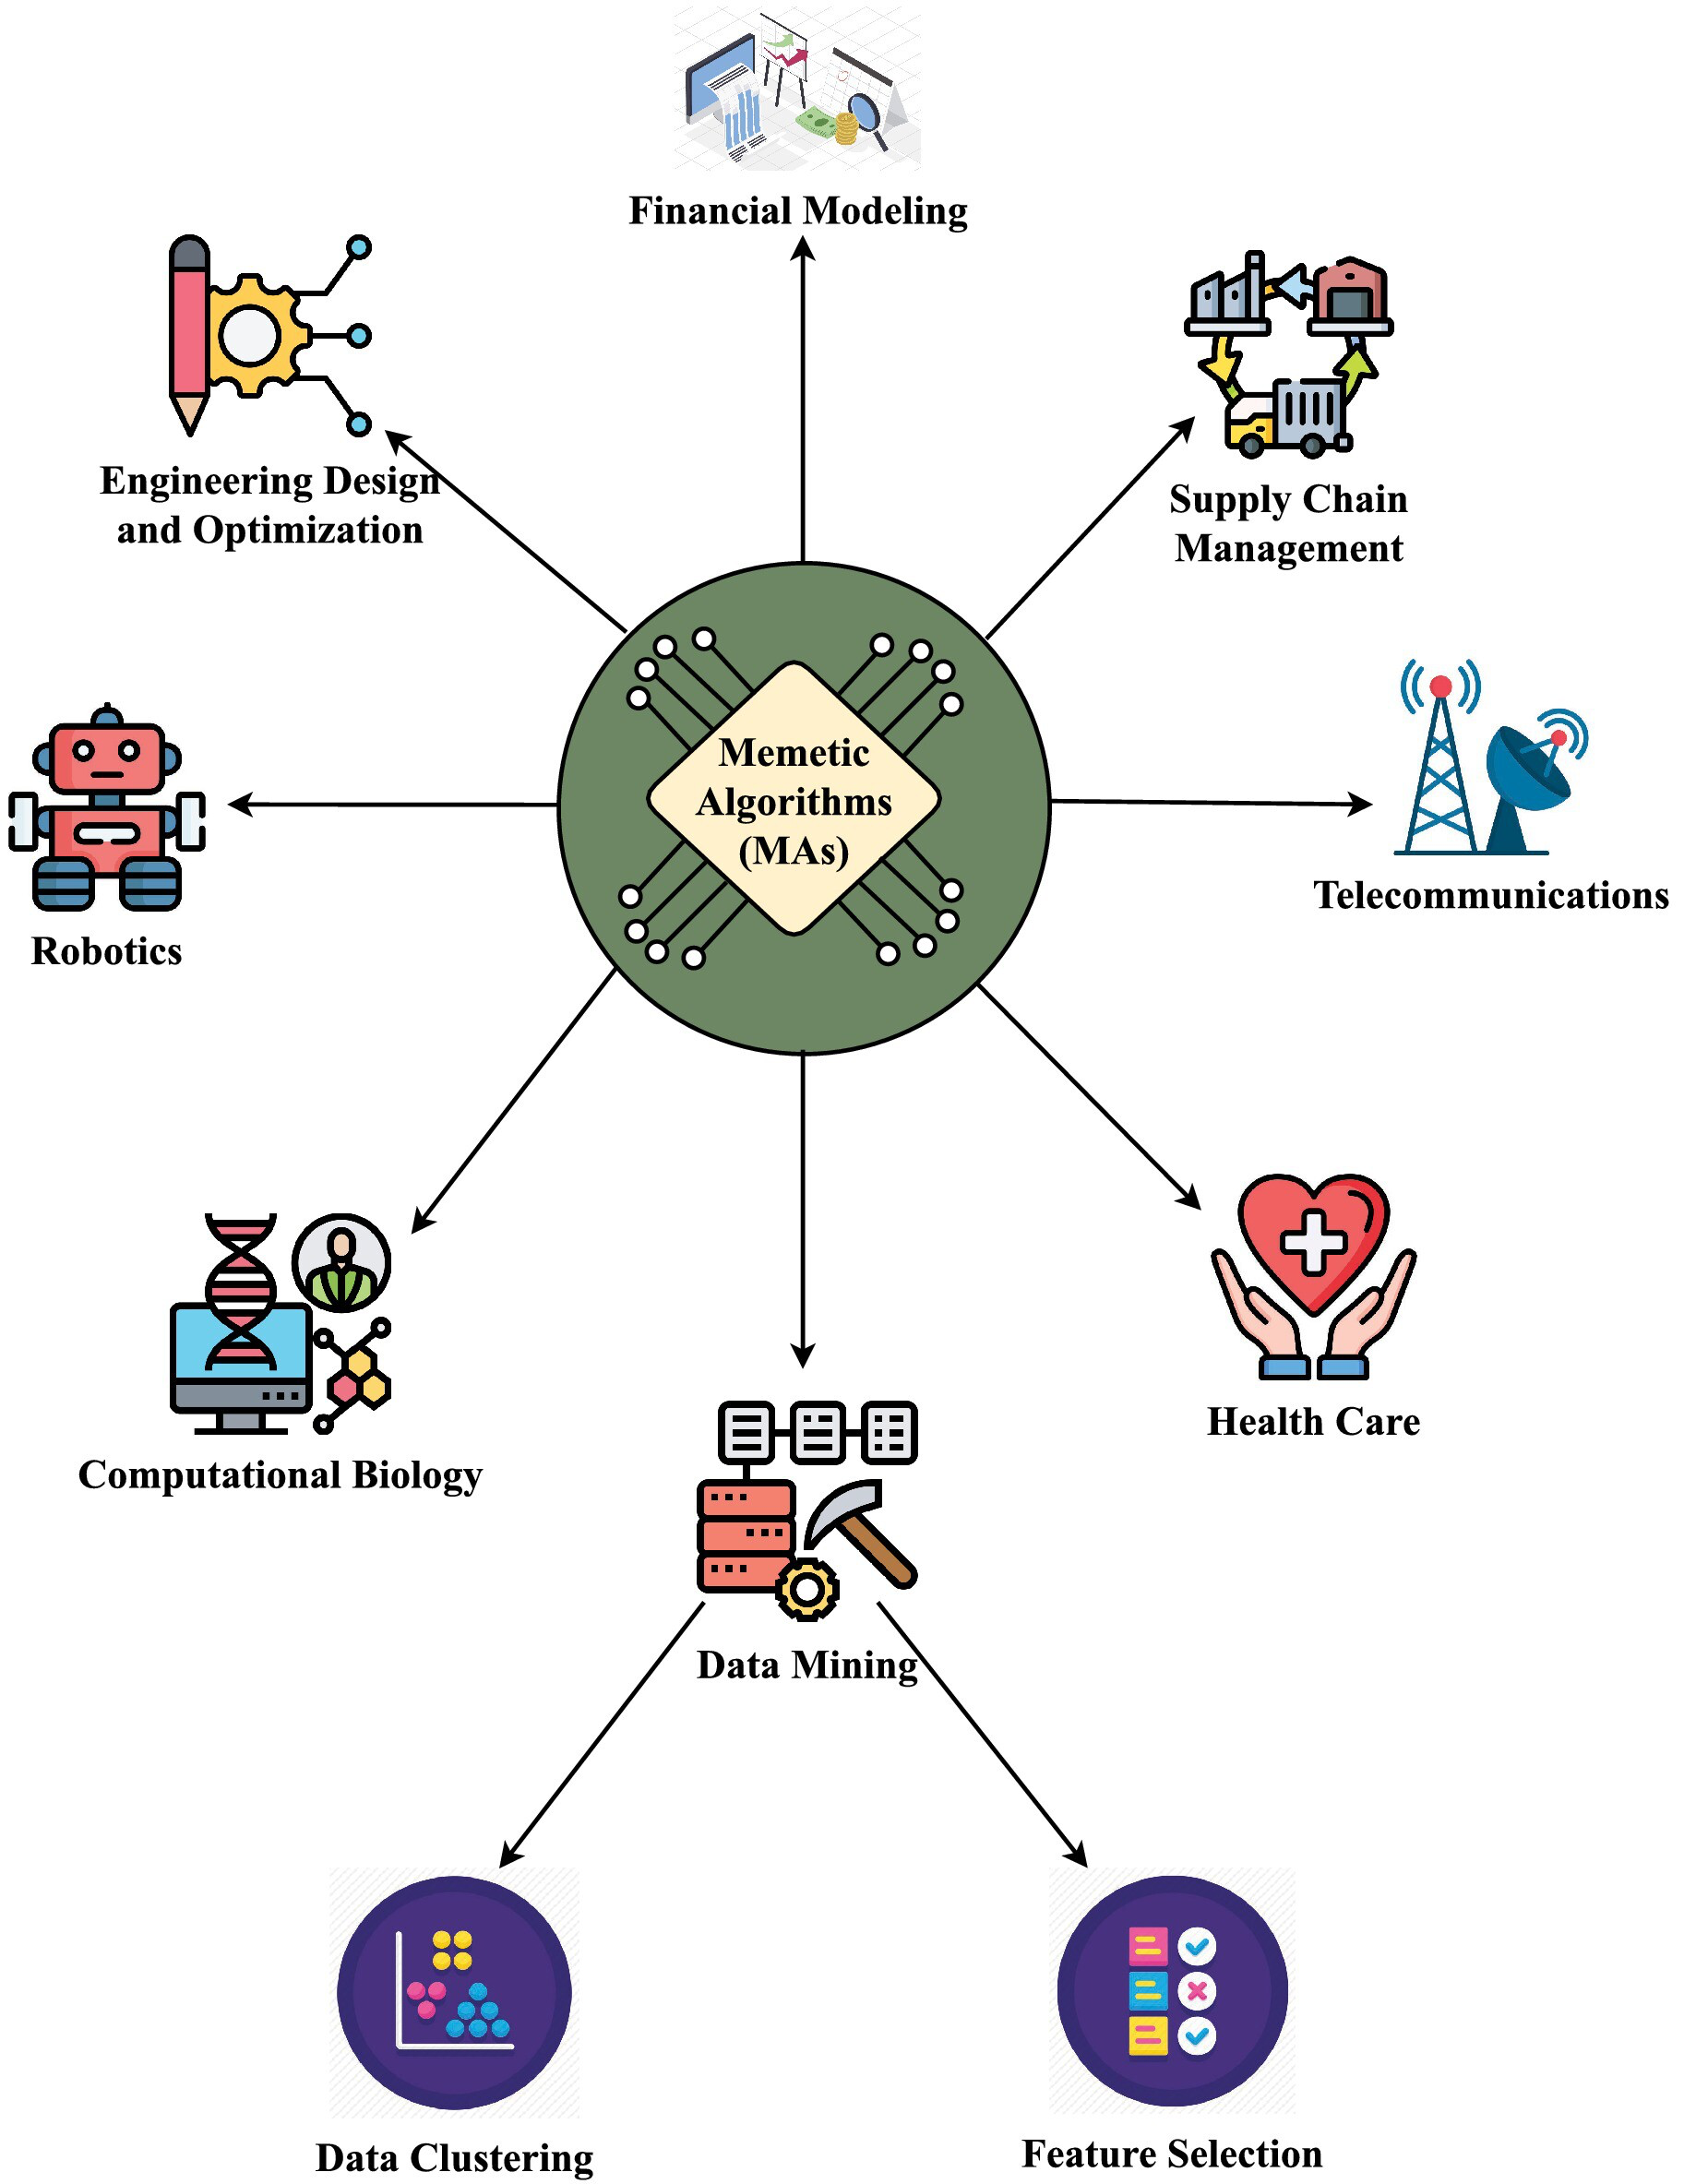

### resumiendo

Si estuviéramos en una clase de arte:

* desde el enfoque genético, los estudiantes solo copiarían los dibujos más bonitos, imitando el resultado
* desde el enfoque memético, lso estudiantes copiarían, pero corregirían sus propios trazos antes de mostrar su versión

De esta forma, la clase mejora más rápido, porque cada alumno aprende y enseña a la vez

* los algoritmos genéticos son como la evolución biológica, los individuos cambian y solo los mejores sobrevivien

* los algoritmos meméticos son colo la evolución de las ideas, las ideas se copian, pero también aprenden antes de compartirse

Los genes *heredan*, pero los memes **aprenden**, y aprenden como si fuera una cultura, entonces, desde esta perspectiva, cuando una computadora aprende desde una cultura, empieza a descubrir soluciones por sí misma

##ejemplo código

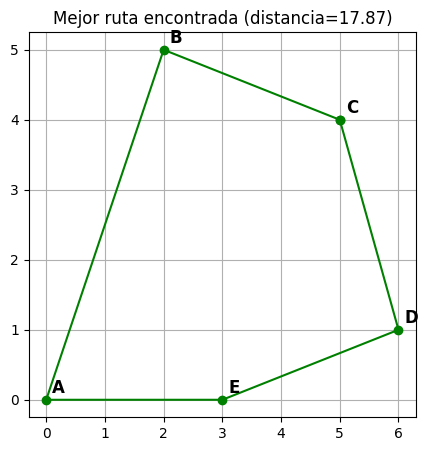

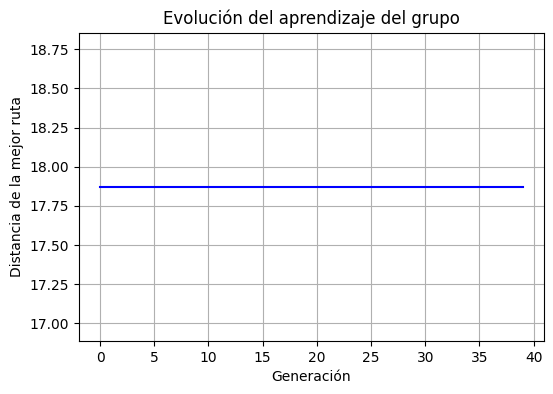

In [ ]:
#importando bibliotecas esenciales
import random
import math
import matplotlib.pyplot as plt

#ciudades del repartidor
CITIES = {
    'A': (0, 0),
    'B': (2, 5),
    'C': (5, 4),
    'D': (6, 1),
    'E': (3, 0)
}

#devuelve todas las claves del diccionario
CITY_NAMES = list(CITIES.keys())

#función para calcular la distancia entre dos ciudades usando la distancia euclidiana
def distance(a, b):
    #se extraen las coordenadas x y y de la ciudad a y b
    ax, ay = CITIES[a]
    bx, by = CITIES[b]
    #calcula la distancia entre ambas con la fórmula euclidiana
    return math.sqrt((ax - bx)**2 + (ay - by)**2)

#función para calcular la longitud total de una ruta
def route_length(route):
    #se suman las distancias entre cada ciudad y la siguiente
    #conecta la última ciudad con la primera en un circuito cerrado
    return sum(distance(route[i], route[(i + 1) % len(route)]) for i in range(len(route)))


#función para generar una ruta aleatoria
def random_route():
    #creando una copia de la lista de ciudades
    route = CITY_NAMES[:]
    #mezcla los elementos de la lista al azar
    #así la lista tiene un orden aleatorio cada vez
    random.shuffle(route)
    #devuelve la ruta
    return route


#operadores genéticos

#cruce genético entre dos rutas para un algoritmo genéticos
#toma dos rutas padres y genera una ruta hija combiando partes de ambas
def crossover(p1, p2):
    #selecciona un segmento aleatorio del primero padre
    start, end = sorted(random.sample(range(len(p1)), 2))
    #crea al hijo con espacios vacíos
    child = [None]*len(p1)
    #copia el segmento del padre 1 al hijo
    child[start:end] = p1[start:end]


    #se inicializa contador
    pointer = 0
    #se recorre p2 en orden
    for city in p2:
        #se agrega cada ciudad que no esté ya en el segmento copiado
        #evita duplicados : si la ciudad no está ya en el hijo
        if city not in child:
            #avanza el contador hasta encontrar una posición vacía
            while child[pointer] is not None:
                #avanza a la siguiente posición
                pointer += 1
            #cuando encuentra una posición vacía, coloca la ciudad en p2 en esa posición
            child[pointer] = city
    #regresa el hijo final
    return child


#función de mutación simple por intercambio (swap mutation)
def mutate(route, rate=0.1):
    #crea una copia de la ruta
    r = route[:]
    #si es menor que rate, ocurre la mutación, sino, la ruta se regresa igual
    if random.random() < rate:
        #elige dos índices distintos para evitar que se repitan
        i, j = random.sample(range(len(r)), 2)
        #intercambia las ciudades en esas dos posiciones
        r[i], r[j] = r[j], r[i]
    #regresala ruta mutada
    return r


#función para intercambiar pares de ciudades y quedarse con el intercambio sí, y solo sí se mejora la ruta
#el repartidor revisa su ruta y mejora pequeños tramos
def local_improvement(route):
    #crea copia de la ruta
    r = route[:]
    #verifica que si hubo mejora
    improved = True
    #ciclo que sigue buscando mejoras hasta que ya no pueda mejorar más
    while improved:
        #al principio del ciclo se asume que no hay mejoras
        improved = False
        #recorre todos los índices de la ruta hacia adelante
        for i in range(len(r)-1):
            #recorre los índices desde i+1 para evitar repetir pares y no intercambiar una ciudad consigo misma
            for j in range(i+1, len(r)):
                #se crea una copia de la ruta actual
                new_r = r[:]
                #se intercambian las ciudades en posiciones i y j
                new_r[i], new_r[j] = new_r[j], new_r[i]
                #si la nueva ruta es más corta, se acepta como mejora
                if route_length(new_r) < route_length(r):
                    #actualiza la ruta r actual
                    r = new_r
                    #marca True para índicar si hubo mejora
                    improved = True
    #regresa la ruta mejorada
    return r


#algoritmo memético

#definición del algoritmo memético
#generaciones, tamaño de la población, probabilidad de mutación
def memetic_algorithm(generations=40, pop_size=20, mutation_rate=0.1):
    #se crea la población inicial generando rutas aleatorias
    population = [random_route() for _ in range(pop_size)]
    #lista para guardar el mejor valor de cada generación
    history = []
    #se repite el proceso evolutivo por cada generación
    #para cada gen en el rango de las generacioones
    for gen in range(generations):
        #se calcula el fitness de cada individuo: fitness = 1/longitud de la ruta
        fits = [1 / route_length(r) for r in population]
        #se obtiene el individuo con mayor fitness (mejor ruta)
        best = population[fits.index(max(fits))]
        #se calcula la distancia e la mejor ruta
        best_dist = route_length(best)
        #se guarda esta distancia en el historial
        history.append(best_dist)

        #el mejor pasa directo : elitismo
        #nueva población
        new_pop = [best]
        #se generan nuevos individuos hasta completar el tamaño de la población
        #mientras el tamaño de la nueva población sea menor que el tamaño de la población, sigue con el ciclo
        while len(new_pop) < pop_size:
            #selección de dos padres de acuerdo al fitness
            p1, p2 = random.choices(population, weights=fits, k=2)
            #se genera un hijo mediante cruce (crossover)
            child = crossover(p1, p2)
            #se aplica mutación al hijo con probabilidad de tasa de mutación
            child = mutate(child, rate=mutation_rate)

            #aquí ocurre la parte memética
            #se mejora localmente el hijo con una búsqueda local
            child = local_improvement(child)
            #se agrega al nuevo hijo mejorando a la nueva población
            new_pop.append(child)
        #la nueva poblacón reemplaza a la anterior
        population = new_pop
    #regresa la mejor solución encontrada y el historial de distancias
    return best, history


#visualización
#lista de coordenadas x
def plot_route(route, title):
    #agrega al final la primera ciudad
    xs = [CITIES[c][0] for c in route] + [CITIES[route[0]][0]]
    #agrega al final la primera ciudad
    ys = [CITIES[c][1] for c in route] + [CITIES[route[0]][1]]
    #crea figura
    plt.figure(figsize=(5,5))
    #
    plt.plot(xs, ys, '-o', color='green')
    #escribe nombre de cada ciudad
    for c in route:
        x, y = CITIES[c]
        plt.text(x+0.1, y+0.1, c, fontsize=12, weight='bold')
    plt.title(title)
    plt.grid(True)
    plt.show()

#ejecución
best, history = memetic_algorithm()
plot_route(best, title=f"Mejor ruta encontrada (distancia={route_length(best):.2f})")

plt.figure(figsize=(6,4))
plt.plot(history, color='blue')
plt.title("Evolución del aprendizaje del grupo")
plt.xlabel("Generación")
plt.ylabel("Distancia de la mejor ruta")
plt.grid(True)
plt.show()
